<a href="https://colab.research.google.com/github/vishrutss/LLM_assignment_1/blob/main/LLM_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Assignment 1
## Submitted by: Vishrut Sharma

# Question 1
The 3 differences between BLOOM and BLOOMZ models are


1.   BLOOMZ is an instruction tuned version of BLOOM, and BLOOMZ performs better at Multilingual Multitask Generalization than BLOOM.

2.   BLOOM is pretrained on ROOTS, a large-scale multilingual corpus, while BLOOMZ is pretrained on xP3 which consists of multilingual datasets with
English prompts.

3. For code generation BLOOM generates on average 70% more characters and 17x more comments than BLOOMZ for a given problem from HumanEval. BLOOMZ is biased towards short and concise answers.





# Question 2

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  I
was a brute, a coward.
I had no right to be in this place.
I was a beast,
an animal;
a beast like those who hate, you know, are as much as the dogs.
And that is why I have killed the man, man, you know.
No.
Because the man is just a monster that kills with the fire.

So I have been a hell of an animal.
You know that.
Yes, that is true.
But a woman,
an ordinary wife to a priest.
She will kill me again, she will come into the hut.
She is right.
But, when I was a child in the wilderness...
She would cut up the trees that grew in the valley.
So she had to leave the valley.
And as she was going to leave,
she saw a place that was a little better than what she had left.
The ground, and the people, and the valley.
And she did not leave.
So she went to it again, and she found something better.
She saw a way out of the valley.
So she set out to find the way.
But she passed the valley by water in the water.
And she crossed it.
And she crossed 

Total words 208

Type Token Rati

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-1b1")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-1b1")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  the devil said to the little black beast,
"My son, your little self has gone astray, and you are at the mercy
of these creatures who wish to give you the best that life can give,
and you are in dire danger, for you are no longer what you were,
but you have become a mere child, I have a fear for you from that
moment."

A black beast with three heads and four feet, a black face, a black
brain, black clothes and no cloak, a black back and no tail, and as
they saw him, the little black beast gave a sharp scream.

But in that moment the soul of the little black beast, and with it the
grim soul of the devil, entered to the soul of the little black beast,
and took every limb from him. The little black beast ran away and
flew. It was said by that which had made this awful transformation
that he would return to the world of his childhood to where every
child is living in this life, and find a place in every home at
once. In this manner he had become a man, and lived in the cou

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-1b7")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-1b7")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  when every man
was a great king



The Great King


I

The Great King had a great castle; it was high up in a hill, and as
a king of the land, he had a great palace and a great wardrobe.

Two very rich girls called Peggy and Belle were in the castle.
Peggy wore gold and silver linen and satins; Belle was pale
and little and had a little white lace under her dress.

The two girls had two little children. One was called Nan the Cat;
the other was called Chip the Dog, who looked at Peggy but never
kissed her.

For two days and three nights the stars were shining on the sea.

There was one white pigeon who flew over the sea and made the waves
sound soft and fair.

Every night before bed, the Great King made a cup of coffee and
eaten.

Every morning he rose straightway and went into his great castle
to meet the stars.

Once, in the morning, as he came out into the hall he was surprised
to find that the Great Queen was gone.

"Where is she?" asked he of the Great Queen's se

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloomz-560m")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-560m")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  we had a lot in common. We had friends, family, and even a lot of love. One day I did a song and I started singing it at my apartment balcony. We were there all the time together. I got a surprise when we were in my room the next day. My love said, "See you soon, sweetie. I hope so". I was excited because I was in my own apartment. I did the same song again and the first time we found each other when that day came, was pretty intense. We have always remained in bed together when we were away. I think a lot of people are scared of sleeping apart a lot of the time, we feel scared being alone. It is fun for everyone to meet people. Everyone has a special or special place in your life. We see each other when we are out and when we sleep together. We have been there together so we can be friends again. When I was in my room, each time I had a surprise. We had so much en-route. It was lovely to see that. We can remember these memories for our kids 

Total words 201

Type To

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloomz-1b1")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b1")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  I made a video about my house . It was one of two I made in two years , as a result of the slowdown of my internet connection . In the future I wanted to do something more of a video on the neighborhood , which I couldn't because my internet service is slow . Now I can do this because I am at least using the internet in my house . I can take pictures and record my own videos because of this internet connection . I can still use the internet for my business activities because of the availability . It's wonderful . I can't wait to finish making the " home " home video project with the new video recording device . The internet was down when I made this " home " video . It wasn't that bad . That was great for using the internet at least to do my yard work . But my internet is slow and that must have affected many more things . Sometimes it takes a long time to get a download or upload to the internet . So the videos will be short . I plan to record these on my phone . Thi

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloomz-1b7")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b7")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  the world went back to normal, then again normal came once again. The last few weeks I was the only one outside my house. None of the other students would let me go out. The entire faculty let me out only if I was a member of my department. For the last few weeks they asked for permission not just before I went out, but whenever they saw me out and I was not there, which made me lose all respect and even felt a sense of loss. I had to stay in the living room with the other students and watch TV over the Internet. I had to do my own research for homework and get rid of my desk in order to not irritate them like they did previously. It took me a long while to get rid of the office space, so I had to ask the other students if I could have my desk back. And again, this time they let me out. If I wasn't there, they wouldn't let me out, which made me feel frustrated. I just wanted to get away and not be around them anymore. 

Total words 197

Type Token Ratio:  0.5685279187

**a)**
*  For both the models I ran the starter code provided but with a few changes. I added min_length, max_length, and do_sample attributes to the model generate function. With min_length and max_length the model generated a longer story, and with do_sample set to true the model was less likely to repeat sentences and instead tried being more creative with the word selection. At first I had tried running the code wothout do_sample but the model kept repeating the same sentences in the generated story.

*  One interesting thing I noticed is that even with min_length set to 200 the model very frequently tended to generate stories with word count below this threshold. The threshold seemed more like a suggestion to the model rather than a strict parameter.


<br>**b)**
*  As shown in the graph and table below the best performing models were BLOOM-1b7 and BLOOMZ-1b7 which was to be expected since these are the largest of each model type.

*  As seen in the graph the perplexity for the BLOOM models gradually decreased and the TTR also slightly increased as expected. But for the BLOOMZ models interestingly the perplexity for BLOOMZ-1b1 was the highest which was unexpected. It is even higher than all the BLOOM models which I did not expect. The TTR value for BLOOMZ-1b1 was also the lowest making it the worst performer compared to all other models. Both the 1b7 models performing the best did not surprise me, although BLOOM-1b7 has better TTR and perplexity compared to BLOOMZ-1b7 making it the best performing model.

<br>**c)**  
*   The story generated by BLOOM-560m appears fragmented, with abrupt transitions between different aspects of the story. And, the story seems to be a bit violent at the start where the protagonist is recounting a violent act, the killing of a man. Overall the story seems very disjointed and is not a very coherent story.

*   The story by BLOOM-1b1, unlike BLOOM-560m, maintains a consistent tone and perspective throughout. It is presented as a story told from the perspective of the devil addressing a little black beast. Both BLOOM-560m and BLOOM-1b1 seem to have a consistent theme of generating dark stories. The story is generally clearer and more coherent than the story by BLOOM-560m. The progression of events is easier to follow.

*  The story by BLOOM-1b7 adopts a more traditional fairy-tale structure. Unlike the the story by BLOOM-560m that hinted at violence, this story seems to lack any explicit conflict or negative emotions. The narrative is somewhat fragmented, with abrupt transitions between sentences.

*  In the story generated by BLOOMZ-560m the language used is more expressive and emotional, with phrases like "I was excited," "pretty intense," and "It was lovely to see that." The story is still a little disjointed but not as much as BLOOM-560m and it is a little bit more coherent.

*  The story generated by BLOOMZ-1b1 contains a lot of contradictions in it. The narrator initially mentions making a video about their house because of the slowdown in their internet connection, and later states, "Now I can do this because I am at least using the internet in my house." This makes the overall story less coherent as it doesn't really make any sense. This is not surprising to me as BLOOMZ-1b1 was the worst performer according to the TTR and perplexity metrics.

*  The story generated by BLOOMZ-1b7 presents a somewhat ambiguous narrative, making it challenging to pinpoint specific details about the setting. The theme of being restricted from going outside or facing limitations in interactions with others is repeated throughout the text. In the story the behavior of the other students is inconsistent, as they initially restrict the narrator's movements, then permit it, but only if the narrator is present. This inconsistency adds to the overall lack of coherence in the narrative. I was surprised by this as according to the metrics BLOOMZ-1b7 had performed well. This shows that even though the model performs well in regards to the metrics the overall result is still not as perfect as we expect.

*  Another thing I noticed is that the BLOOMZ models generated stories about everyday life which contrasts with the stories generated by BLOOM models which were more dark and fictional in style.

,Models,TTR,Perplexity
0,B-560m,0.557692,13.522009
1,B-1b1,0.570048,11.946960
2,B-1b7,0.585000,9.162739
3,BZ-560m,0.572139,13.923500
4,BZ-1b1,0.484581,14.680742
5,BZ-1b7,0.568528,10.270087


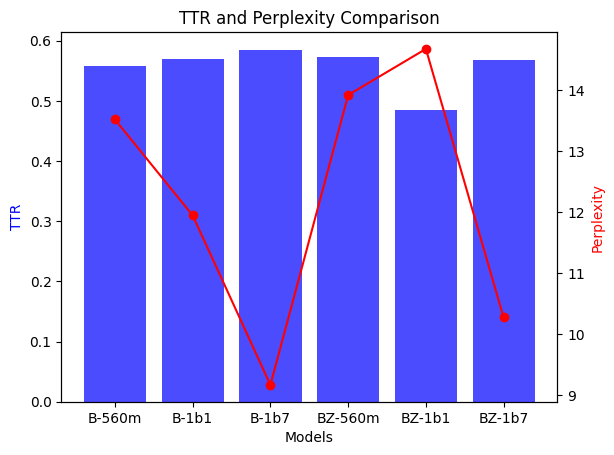

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {'Models': ['B-560m', 'B-1b1', 'B-1b7',
                   'BZ-560m', 'BZ-1b1', 'BZ-1b7'],
        'TTR': [0.5576923076923077,
                0.5700483091787439,
                0.585,
                0.572139303482587,
                0.4845814977973568,
                0.5685279187817259],
        'Perplexity': [13.522008895874023,
                       11.94696044921875,
                       9.162738800048828,
                       13.923500061035156,
                       14.680742263793945,
                       10.270087242126465]}

df = pd.DataFrame(data)

display(df)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df['Models'], df['TTR'], color='b', alpha=0.7, label='TTR')
ax2.plot(df['Models'], df['Perplexity'], color='r', marker='o', label='Perplexity')

ax1.set_xlabel('Models')
ax1.set_ylabel('TTR', color='b')
ax2.set_ylabel('Perplexity', color='r')

plt.title('TTR and Perplexity Comparison')
plt.show()


# Question 3

3)
*  As shown in the graph above in question 2b the best performing models for me were BLOOM-1b7 and BLOOMZ-1b7. This was to be expected since they are the largest of each model type. With respect to the metrics I noticed a gradual increase in the Type Token Ratio (TTR), and a gradual decrease in perplexity for the BLOOM models. I expected this as the models got bigger the metrics would favour the larger models. But when it came to the BLOOMZ models I noticed a different trend. From BLOOMZ-560m to BLOOMZ-1b1 there was a decrease in the TTR value and an increase in perplexity. I expected a similar trend as the BLOOM models but in the BLOOMZ models the 1b1 model performed the worst.

*  Overall this showed me that the bigger models are more likely to perform better compared to smaller models. There are instances where a smaller model outperforms a larger model, as evidenced by my testing, which showed BLOOMZ-560m outperforming BLOOMZ-1b1. However, this trend becomes less likely with more runs of each model.

# Question 4

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-1b7")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloom-1b7")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")

In [ ]:
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True,
                         temperature=0.6, top_k=60, top_p=0.8,
                         repetition_penalty=1.1)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  I was in the middle of nowhere
And I found this little girl who was just like me.
She had been abandoned by her parents, and she'd lived with an old man for almost ten years,
but he didn't want to leave her alone anymore because he'd always thought that she might be his daughter.
So one day when they were out on their farm, they'd gone into the backyard where there used to be a pond.
But it was so cold outside that they'd stayed inside until they got home from work.
Then all at once...
I saw something strange.
What?
A shadowy figure standing right beside them.
It wasn't my mother or father.
They never came here before!
Why would anyone come here?
Because someone wanted to kill them.
Who's killing us?
I don't know.
Maybe they're not real people either.
Well, maybe it's just some kind of evil spirit that's trying to get away from our world.
Yeah.
It's probably just some kind of ghost.
Hey!
Look who's here!
Come over here, you guys.
- Hey!
- Come on!
This is really weird

In [ ]:
import torch
import torch.nn.functional as F

from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bigscience/bloomz-1b7")
model = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b7")
inputs = tokenizer.encode("Once upon a time ", return_tensors="pt")

In [ ]:
outputs = model.generate(inputs, min_length=200, max_length=250, do_sample=True,
                         temperature=0.6, top_k=60, top_p=0.8,
                         repetition_penalty=1.1)
generated_text=tokenizer.decode(outputs[0], skip_special_tokens=True)

def calculate_perplexity():
    with torch.no_grad():
        input_ids = tokenizer.encode(generated_text, return_tensors="pt")
        logits = model(input_ids).logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
        labels = input_ids[:, 1:]
        predicted_probabilities = torch.gather(probabilities[:, :-1, :], dim=-1, index=labels.unsqueeze(-1))
        neg_log_likelihood = -torch.log(predicted_probabilities).sum()
        perplexity = torch.exp(neg_log_likelihood / labels.numel())

    return perplexity

def calculate_ttr():
    tokens = generated_text.split()
    total_tokens = len(tokens)
    unique_words = set(tokens)
    total_types = len(unique_words)
    ttr = total_types / total_tokens
    return ttr

total_words = len(generated_text.split())
perplexity = calculate_perplexity()
print(generated_text,"\n\nTotal words",total_words)
print("\nType Token Ratio: ", calculate_ttr())
print("\nPerplexity: ", perplexity.item())

Once upon a time  the Lord God of heaven and earth had created all things. He was pleased with them, but he also knew that they were imperfections in themselves. The Lord God made man perfect by his Son Jesus Christ. All creation is now subject to Him (1 Corinthians 3:16). And so we can say that everything has its place in God's plan for human life on Earth. No one should try to take away from this plan or alter it because it's God's will. But if you want to change it then... read more about how to do so at our blog: Change your world through love: A guide to loving others. This isn't an easy thing to do, as many people have trouble understanding why God wants us to love others when we're already in conflict with each other. However, being kind to everyone around you would make your life much better overall. If you're not sure what kindness means, ask someone who does know it! Read 1 Peter 4:12-13: "Do not be angry with those whom you disagree with; forgive their faults even if they ar

For both the best performing models I added the following parameters to improve performance:
*  temperature=0.6
*  top_k=60
*  top_p=0.8
*  repetition_penalty=1.1

<br>The results are as follows:

BLOOM-1b7:
*  Type Token Ratio: 0.86538
*  Perplexity: 8.33111

BLOOMZ-1b7
*  Type Token Ratio: 0.86458
*  Perplexity: 8.78834

<br>For both models, the addition of these parameters contributed to achieving the best performance observed so far.

The significant increase in the TTR value indicates a diverse range of tokens being utilized. This diversity can be attributed to the temperature parameter, which enhances the variability of the generated text. The inclusion of the repetition penalty further reduced the repetition of tokens, increasing the TTR value.

The perplexity has also decreased for both models. This improvement can be attributed to the balance between temperature, top-k, top-p, and repetition penalty. During my testing even slight adjustments to any one of these parameters led to a significant increase in perplexity. Maintaining a moderate temperature value likely helped the model remain focused and reduced uncertainty in predictions, ultimately resulting in lower perplexity.


# Attributions
*  For question 1 I have referred the research paper: https://arxiv.org/pdf/2211.01786.pdf

*  I received some help from ChatGPT for the code to calculate perplexity.